## クラスタリング

### k-meansクラスタリング

データのある領域を代表するような`クラスタ重心`を見つけようとするアルゴリズム

1. 個々のデータポイントを最寄りのクラスタ重心に割り当てる
2. 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する
3. 1へ戻る

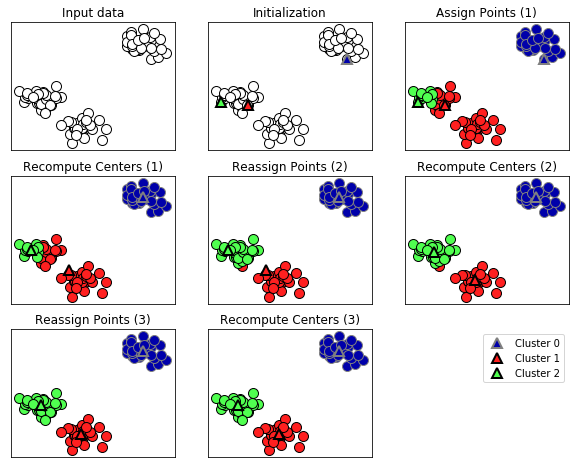

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

mglearn.plots.plot_kmeans_algorithm()
plt.show()

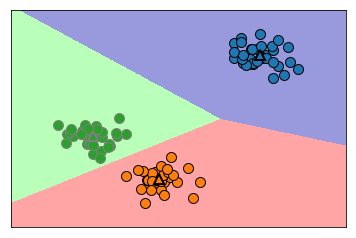

In [2]:
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [5]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


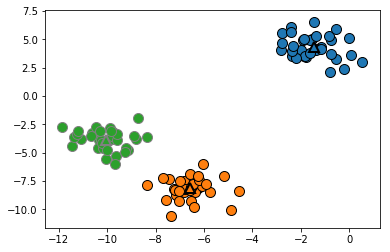

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

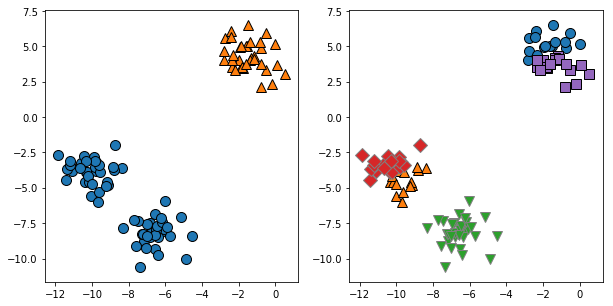

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

plt.show()

### k-meansがうまくいかない場合

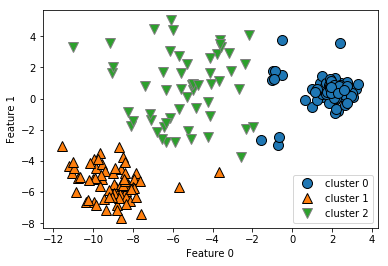

In [8]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-meansは最も近いクラスタセンタへの距離しか考慮しないので，丸くないクラスタを識別出来ない

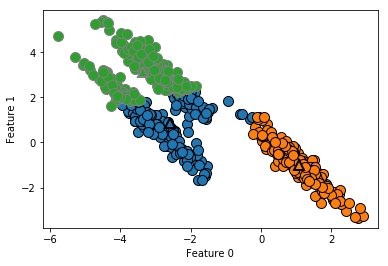

In [9]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

また複雑な形に対してもk-means法はうまく機能しない

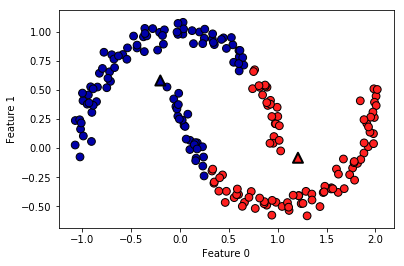

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
ｐｌｔ.show()

#### ベクトル量子化, もしくは成分分解としてのk-means

k-meansはクラスタリングアルゴリズムだが，PCAやNMFなどの成分分解手法の間には類似性がある．
- PCA
    - データ中の最も分散が大きい方向を見出そうとする
- NMF
    - 足しこんで行くことの出来る成分を見つけようとする
    
これらの手法はデータポイントを複数の成分の和として表現しようとする．

k-meansはクラスタセンタで個々のデータポイントを表現しようとする．=>個々のデータポイントをクラスタセンタとして与えられる単一の成分で表現していると考えることが出来る．

k-meansを単一成分で個々のデータポイントを表現する成分分解手法として見る考え方を`ベクトル量子化`と呼ぶ

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.


X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

k-meansを用いたベクトル量子化は，入力次元の数よりもはるかに多くのクラスタを使うことが出来ることだ．

two_moonsデータセットのように二次元のような次元数が少ないものに対しては，PCAやNMFを用いると次元を減らすので，データの構造が破壊されてしまう．
しかし多数のクラスタセンタでk-meansを用いれば，次元数を増やすことができ，更に強力な表現を見つけることが出来る

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
print("Cluster memberships:\n{}".format(y_pred))

In [ ]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

### k-meansまとめ

- メリット
    - 比較的高速
- デメリット
    - 初期化が乱数で行われる
    - クラスタの形に対してかなり制約の強い仮定を必要とする
    - 探しているクラスタの数をユーザが指定しなければ行けない事

### 凝縮型クラスタリング

`凝縮型クラスタリング`はある原則に基づく一連のクラスタリングアルゴリズムである．これらのアルゴリズムは個々のデータポイントをそれぞれ個別のクラスタとして開始し，最も類似した2つのクラスタを合併している．これは何らかの終了条件を満たされるまで繰り返す．scikit-learnに実装されている終了条件はクラスタの数である．

「最も類似したクラスタ」を決定する`連結(linkage)`度には様々なものがあり，この連結度は常に2つの既存クラスタ間に定義される．

- ward
    - デフォルト．併合した際にクラスタ内の分散の増分が最小になるように2つのクラスタを選択する．比較的同じサイズのクラスタになる．
- average
    - クラスタ間の全てのポイント間の距離の平均値が最小の2クラスタを併合する．
- complete
    - 2クラスタの点間の距離の最大値が最小となるものを併合する
    
wardは殆どのデータセットでうまく行く．クラスタによってデータポイントの数が極端に違う場合average, completeの方がうまくいく可能性がある．

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means法ではクラスタ数を指定しなければならないが，凝縮型クラスタリングメソッドは正しいクラスタ数を選択する手助けをしてくれる．

### 階層型クラスタリングとデンドログラム

凝縮型クラスタリングを行うと，いわゆる`階層型クラスタリング`が行われる．このクラスタリングは同じ手続きを繰り返すことで行われる．すべての点は一点しか含まれていないクラスタから最後のクラスタのいずれかに向かっていく．繰り返しの各ステップ終了時はそれぞれ異なる．

In [ ]:
mglearn.plots.plot_agglomerative()
plt.show()

階層型クラスタリングを可視化するには`デンドログラム`と呼ばれる方法がある．

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)

dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

### DBSCAN

密度に基づくノイズあり空間クラスタリング
- メリット
    - ユーザがクラスタ数を先験的に与える必要がない
    - どのクラスタリングにも属さない点を判別できることである
    
DBSCANは特徴空間に置いて多くの点が近接しているような「混んでいる」領域に属する点を見つける．このような領域は特徴空間の`高密度`領域と呼ばれる．DBSCANはクラスタはデータ中で高密度領域を構成していて，空虚な領域で区切られているという考え方に基づく．

高密度領域の中にあるデータポイントは`コアサンプル`と呼ばれる．
DBSCANにはmin_samplesとepsをいう2つのパラメータがある．

あるデータポイントから距離eps以内にmin_samples以上のデータポイントがある場合に，そのデータポイントはコアサンプルとなる．DBSCANでは，esp以内にあるコアサンプルは同じクラスタに割り当てられる．

#### アルゴリズム

1. 適当に一つのデータポイントを選ぶところから始まる．そのデータポイントから距離esp以内にある全てのデータポイントを見つける

2. その数がmin_samples以下なら，ノイズとなる．以上ならその点コアサンプルとなり，新しいクラスタラベルが割り当てられる．

3. esp以内にある全ての近傍点をテストし，それらの点がまだクラスタに割り当てられて居なければ，新しい近傍点をテストする．近傍点がコアサンプルであれば，その近傍を更にテストする．

4. クラスタは，クラスタからesp以内にコアサンプルが存在しなくなるまで成長を続ける．

5. これが終わると，まだ調べていない点を選んで同じ手続きを繰り返す

#### 最終的な成果物

- コアポイント
- 境界ポイント(コアポイントから距離esp以内にあるデータポイント)
- ノイズ

In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

In [ ]:
mglearn.plots.plot_dbscan()
plt.show()

espで暗黙的にクラスタ数を制御することになるが，よいespの値を見るけるにはStandardScalerやMinMaxScalerでスケール変換してからの方が用意なことが多い．

In [ ]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## クラスタリングアルゴリズムの比較と評価

クラスタリングアルゴリズムを利用する際には，アルゴリズムがどの程度うまく機能したかを判断し，書くアルゴリズムがどの程度うまく機能したかを判断するのが難しい．

#### 正解アルゴリズムを用いたクラスタリングの評価

クラスタリングアルゴリズムの出力を，正解データクラスタリングと比較して評価するために用いられる指標

- 調整ランド指数(ARI)
- 正規化相互情報量(NMI)

定量的な指標で裁量な場合を1, 関係無いクラスタリング場合0を取る

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
        adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

#### 正解データを用いないクラスタリングの評価

- シルエット係数
    - クラスタのコンパクトさを計算する，大きい方がよく，完全な場合で1になる

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()

#### 顔画像データセットを用いたアルゴリズムの比較

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

##### DBSCAN

In [ ]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

In [ ]:
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

plt.show()

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
    
plt.show()

##### k-means

In [ ]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)
plt.show()

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)
plt.show()

#### 凝集型クラスタリング

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

In [ ]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

In [ ]:
linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
        
plt.show()

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: 
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)
        
plt.show()

### クラスタリング手法のまとめ

- k-means
    - クラスタセンタを用いてクラスタの特徴を表すことが出来る
    - 個々のデータポイントがクラスタセンタによって表現された成分分解手法
- DBSCAN
    - ノイズを検出可能
    - 自動的にクラスタの数を決められる
    - 複雑な形状のクラスタを発見出来る
- 凝集型クラスタリング
    - データの階層的な分割の候補を提示出来る

k-meansと凝集型クラスタリングではクラスタの数を指定することが出来る．
DBSCANではepsパラメータを用いて近接度を指定すると，間接的にクラスタサイズを制御することが出来る．